# Unit 5 - Financial Planning

In [63]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3


In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [67]:
# Fetch current BTC price

btc_response=requests.get(btc_url).json()
btc_price=btc_response['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_val = my_btc * btc_price
my_eth_val = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_val:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_val:0.2f}")

The current value of your 1.2 BTC is $75101.25
The current value of your 5.3 ETH is $22327.02


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [68]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [69]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [70]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit=1000
).df

# Preview DataFrame
df_investments.head()

AGG                                      SPY  \
                               open    high     low   close   volume    open   
time                                                                           
2020-08-18 00:00:00-04:00  118.4279  118.60  118.42  118.54  6974488  338.34   
2020-08-19 00:00:00-04:00  118.6500  118.70  118.34  118.37  8072234  339.05   
2020-08-20 00:00:00-04:00  118.5800  118.71  118.56  118.57  7608213  335.36   
2020-08-21 00:00:00-04:00  118.7400  118.76  118.55  118.69  9369852  337.92   
2020-08-24 00:00:00-04:00  118.7200  118.82  118.60  118.62  8887200  342.12   

                                                                
                             high       low   close     volume  
time                                                            
2020-08-18 00:00:00-04:00  339.10  336.6100  338.62   66539876  
2020-08-19 00:00:00-04:00  339.61  336.6200  337.22  115453214  
2020-08-20 00:00:00-04:00  338.80  335.2200  338.25   71552086  
2020-08-21 00:00:00-04:00  339.72  337.5500  339.44   85164214  
2020-08-24 00:00:00-04:00  343.00  339.4504  342.94   79073131

In [71]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.54
Current SPY closing price: $338.62


In [72]:
# Compute the current value of shares
my_spy_val = my_spy * spy_close_price
my_agg_val = my_agg * agg_close_price



# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_val:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_val:0.2f}")

The current value of your 50 SPY shares is $16931.00
The current value of your 200 AGG shares is $23708.00


### Savings Health Analysis

In [73]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_val + my_eth_val,
    my_spy_val + my_agg_val,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,97428.26497
shares,40639.00000


<AxesSubplot:title={'center':'Composition Personal Savings'}, ylabel='amount'>

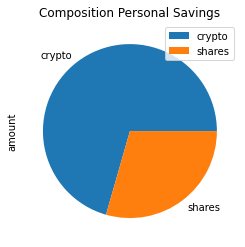

In [74]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition Personal Savings")

In [75]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats, you have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congrats, you reached your goal.")
elif total_savings!= emergency_fund:
    print("You do not have enough money in your savings fund.")

Congrats, you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [76]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-18', tz='America/New_York').isoformat()

In [77]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0     NaN   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0  243.11   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0  244.83   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0  246.73   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0  247.92   

                                                               
                             high     low   close      volume  
time                                                           
2017-08-28 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-08-29 00:00:00-04:00  245.15  242.93  244.85  40179210.0  
2017-08-30 00:00:00-04:00  246.32  244.62  246.04  40088765.0  
2017-08-31 00:00:00-04:00  247.77  246.61  247.42  52550897.0  
2017-09-01 00:00:00-04:00  248.33  247.67  247.88  39588857.0

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [79]:
# Printing the simulation input data
MC_thirty_yr.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-28 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   

                                                    
                               volume daily_return  
time                                                
2017-08-28 00:00:00-04:00         NaN          NaN  
2017-08-29 00:00:00-04:00  40179210.0          NaN  
2017-08-30 00:00:00-04:00  40088765.0     0.004860  
2017-08-31 00:00:00-04:00  52550897.0     0.005609  
2017-09-01 00:00:00-04:00  39588857.0     0.001859

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_yr.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_yr.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_yr.summarize_cumulative_return()



# Print summary statistics
print(tbl)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower= round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yr.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_5 = MC_five_yr.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_five_yr.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_five_yr.summarize_cumulative_return()



# Print summary statistics
print(tbl_5)

In [ ]:
# Set initial investment
ci_lower_5 = round(tbl_5[8] * initial_investment,2)
ci_upper_5 = round(tbl_5[9] * initial_investment,2)



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yr.calc_cumulative_return()

In [ ]:
# Plot simulatline_plot_ten = MC_ten_year.plot_simulation()ion outcomes
line_plot_ten = MC_ten_yr.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_yr.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")